In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
gdf = gpd.read_file("Full Constituency Data.gpkg")

In [4]:
gdf = gdf[["constituency", "geometry"]]
gdf.rename(columns={"constituency": "Constituency"}, inplace=True)

In [5]:
df = pd.read_csv("All Predictions.csv")

In [6]:
df = pd.merge(gdf, df, on="Constituency")

In [22]:
def map_constituency(constituency:str):
    '''Takes a constituency and plots it on a map of the UK'''
    cdf = df[df["Constituency"] == constituency]
    ax = gdf.plot(figsize=(20,20), color="lightgray", edgecolor="none")
    cdf.plot(ax=ax, color='red', edgecolor="none")
    plt.show()

In [23]:
def constituency_predictions(constituency:str, show:str):
    '''Creates a series of bar plots showing the various predictions for a given constituency and the result at the previous election. The variable "show" can be set to "all" to display all these charts or you can specify a specific prediction to display'''

    party_colours = {"con":"#0087DC", "lab":"#E4003B","ld":"#FAA61A" ,"grn":"#02A95B", "ref":"#12B6CF",  "snp":"#FDF38E", "pc":"#005B54", "other":"#000000"}

    if constituency not in df["constituency"].unique():
        raise KeyError("Invalid constituency")
    
    #Create a mini dataframe with just that constituency's data
    cdf = df[df["Constituency"] == constituency]

    #Set up the subplots as specified by the user
    if show == "all":
        fig, axes = plt.subplots(4,2, figsize=(20,40))
    else:
        fig, axes = plt.subplots(1,2, figsize=(10,5))

    #Title the graph
    fig.suptitle(constituency, fontsize=20)

    colours = sns.color_palette(list(party_colours.values()))

    parties = ["con", "lab", "ld", "grn", "ref", "snp", "pc", "other"]

    #Creating the barplot for the mean prediction
    if show == "mean" or show == "all":
        #Find the correct position based for this plot
        if show == "mean":
            pos = 1
        else:
            pos = 0,1

        #Generate the barplot
        means = cdf[["mean_Con", "mean_Lab", "mean_LDem", "mean_Grn", "mean_Ref", "mean_SNP", "mean_PC","mean_Other"]]
        sns.barplot(ax = axes[pos], x=list(means.columns), y=means.iloc[0], palette=colours, hue=list(means.columns))
        axes[pos].set_xticklabels(parties)
        axes[pos].set_ylabel("")
        axes[pos].set_title("2024 Predictions Average")
        for i in range(len(party_colours.keys())):
            axes[pos].text(list(means.columns)[i], means.iloc[0, i], f'{round(means.iloc[0,i],1)}%', color='black', ha="center", va="bottom")

    #Find the correct position for the 2019 chart
    if show == "all":
        pos = 0,0
    else:
        pos = 0
    #Plot 2019 chart
    prev = cdf[["con_%_2019", "lab_%_2019", "ld_%_2019", "grn_%_2019", "ref_2019_%", "snp_2019_%", "pc_2019_%","other_2019_%"]]
    sns.barplot(ax = axes[pos], x=list(prev.columns), y=prev.iloc[0], palette=colours, hue=list(prev.columns))
    axes[pos].set_xticklabels(parties)
    axes[pos].set_ylabel("")
    axes[pos].set_title("2019 Result (Notional)")
    for i in range(len(parties)):
        axes[pos].text(list(prev.columns)[i], prev.iloc[0, i], f'{round(prev.iloc[0,i],1)}%', color='black', ha="center", va="bottom")

    #Britain Predicts Model
    if show == "bp" or show == "all":
        if show == "bp":
            pos = 1
        else:
            pos = 1,0
        bp = cdf[["BP_Con", "BP_Lab", "BP_LDem", "BP_Grn", "BP_Ref", "BP_SNP", "BP_PC","BP_Other"]]
        sns.barplot(ax = axes[pos], x=list(bp.columns), y=bp.iloc[0], palette=colours, hue=list(bp.columns))
        axes[pos].set_xticklabels(parties)
        axes[pos].set_ylabel("")
        axes[pos].set_title("Britain Predicts")
        for i in range(len(parties)):
            axes[pos].text(list(bp.columns)[i], bp.iloc[0, i], f'{round(bp.iloc[0,i],1)}%', color='black', ha="center", va="bottom")
        
    #Election Maps UK model
    if show == "em" or show == "all":
        if show == "em":
            pos = 1
        else:
            pos = 1,1
        em = cdf[["EM_Con", "EM_Lab", "EM_LDem", "EM_Grn", "EM_Ref", "EM_SNP", "EM_PC", "EM_Other"]]
        sns.barplot(ax = axes[pos], x=list(em.columns), y=em.iloc[0], palette=colours, hue=list(em.columns))
        axes[pos].set_xticklabels(parties)
        axes[pos].set_ylabel("")
        axes[pos].set_title("Election Maps UK")
        for i in range(len(parties)):
            axes[pos].text(list(em.columns)[i], em.iloc[0, i], f'{round(em.iloc[0,i],1)}%', color='black', ha="center", va="bottom")

    #The Economist Model
    if show == "e" or show == "all":
        if show == "e":
            pos = 1
        else:
            pos = 2,0
        e = cdf[["E_Con", "E_Lab", "E_LDem", "E_Grn", "E_Ref", "E_SNP", "E_PC", "E_Other"]]
        sns.barplot(ax=axes[pos], x=list(e.columns), y=e.iloc[0], palette=colours, hue=list(e.columns))
        axes[pos].set_xticklabels(parties)
        axes[pos].set_ylabel("")
        axes[pos].set_title("The Economist")
        for i in range(len(parties)):
            axes[pos].text(list(e.columns)[i], e.iloc[0, i], f'{round(e.iloc[0,i],1)}%', color='black', ha="center", va="bottom")

    #YouGov MRP
    if show == "y" or show == "all":
        if show == "y":
            pos = 1
        else:
            pos = 2,1
        yg = cdf[["Y_Con", "Y_Lab", "Y_LDem", "Y_Grn", "Y_Ref", "Y_SNP", "Y_PC", "Y_Other"]]
        sns.barplot(ax=axes[pos], x=list(yg.columns), y=yg.iloc[0], palette=colours, hue=list(yg.columns), legend=False)
        axes[pos].set_xticklabels(parties)
        axes[pos].set_ylabel("")
        axes[pos].set_title("YouGov")
        for i in range(len(parties)):
            axes[pos].text(list(yg.columns)[i], yg.iloc[0, i], f'{round(yg.iloc[0,i],1)}%', color='black', ha="center", va="bottom")

    #Survation MRP
    if show == "s" or show == "all":
        if show == "s":
            pos = 1
        else:
            pos = 3,0
        sv = cdf[["S_Con", "S_Lab", "S_LDem", "S_Grn", "S_Ref", "S_SNP", "S_PC", "S_Other"]]
        sns.barplot(ax=axes[pos], x=list(sv.columns), y=sv.iloc[0], palette=colours, hue=list(sv.columns), legend=False)
        axes[pos].set_xticklabels(parties)
        axes[pos].set_ylabel("")
        axes[pos].set_title("Survation")
        for i in range(len(parties)):
            axes[pos].text(list(sv.columns)[i], sv.iloc[0, i], f'{round(sv.iloc[0,i],1)}%', color='black', ha="center", va="bottom")    

    #More in Common MRP
    if show == "mc" or show == "all":
        if show == "mc":
            pos = 1
        else:
            pos = 3,1
        mc = cdf[["MC_Con", "MC_Lab", "MC_LDem", "MC_Grn", "MC_Ref", "MC_SNP", "MC_PC", "MC_Other"]]
        sns.barplot(ax=axes[3,1], x=list(mc.columns), y=mc.iloc[0], palette=colours, hue=list(mc.columns), legend=False)
        axes[pos].set_xticklabels(parties)
        axes[pos].set_ylabel("")
        axes[pos].set_title("More in Common")
        for i in range(len(parties)):
            axes[pos].text(list(mc.columns)[i], mc.iloc[0, i], f'{round(mc.iloc[0,i],1)}%', color='black', ha="center", va="bottom")    

    plt.show()

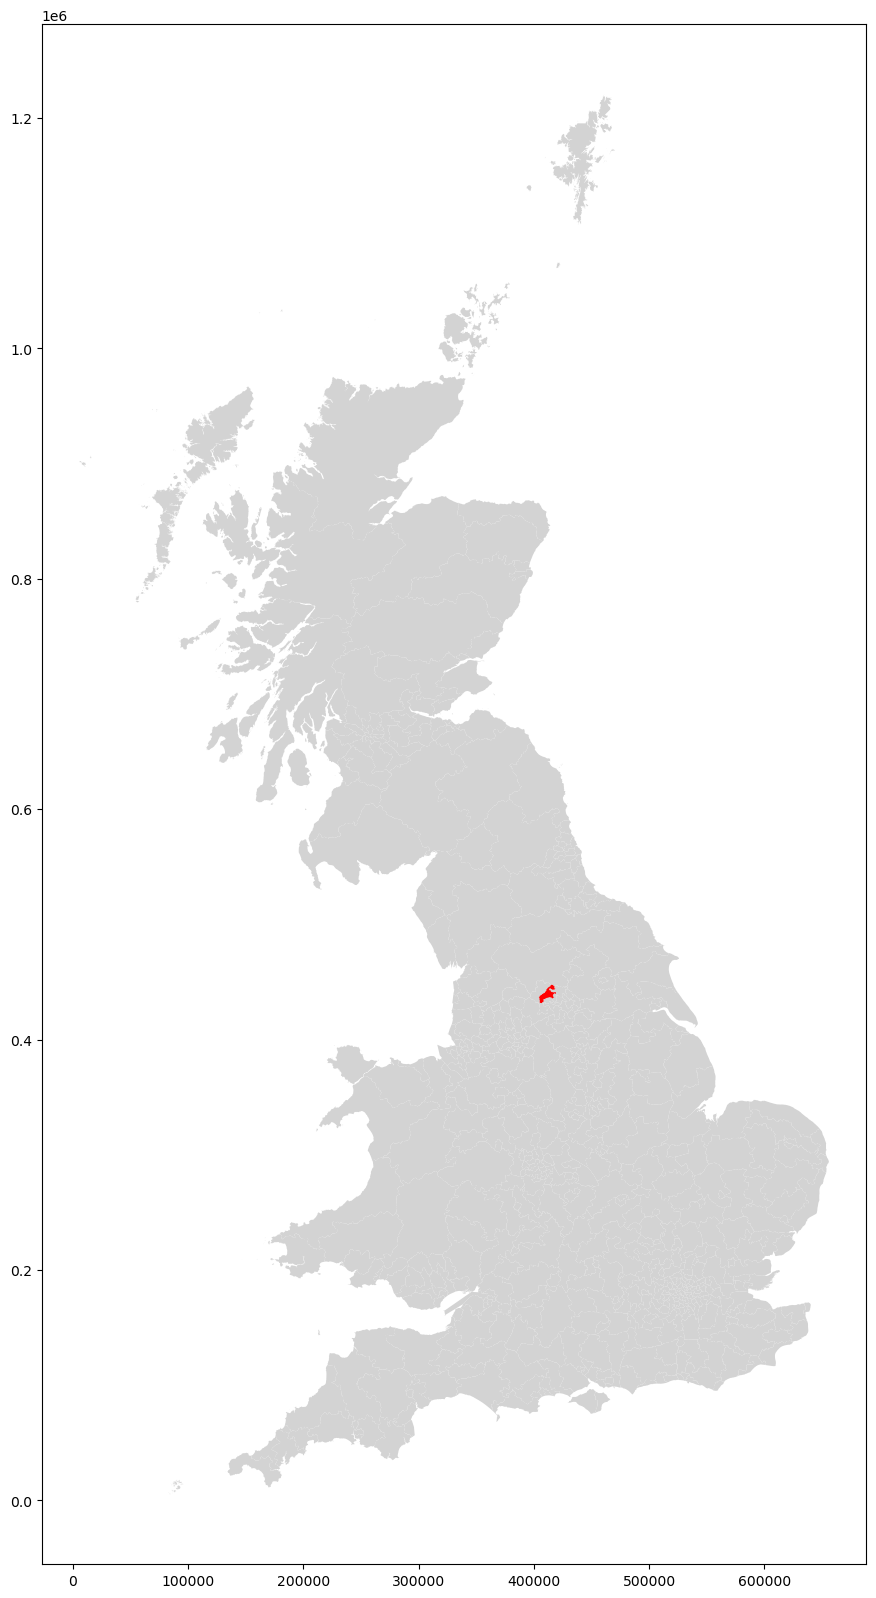

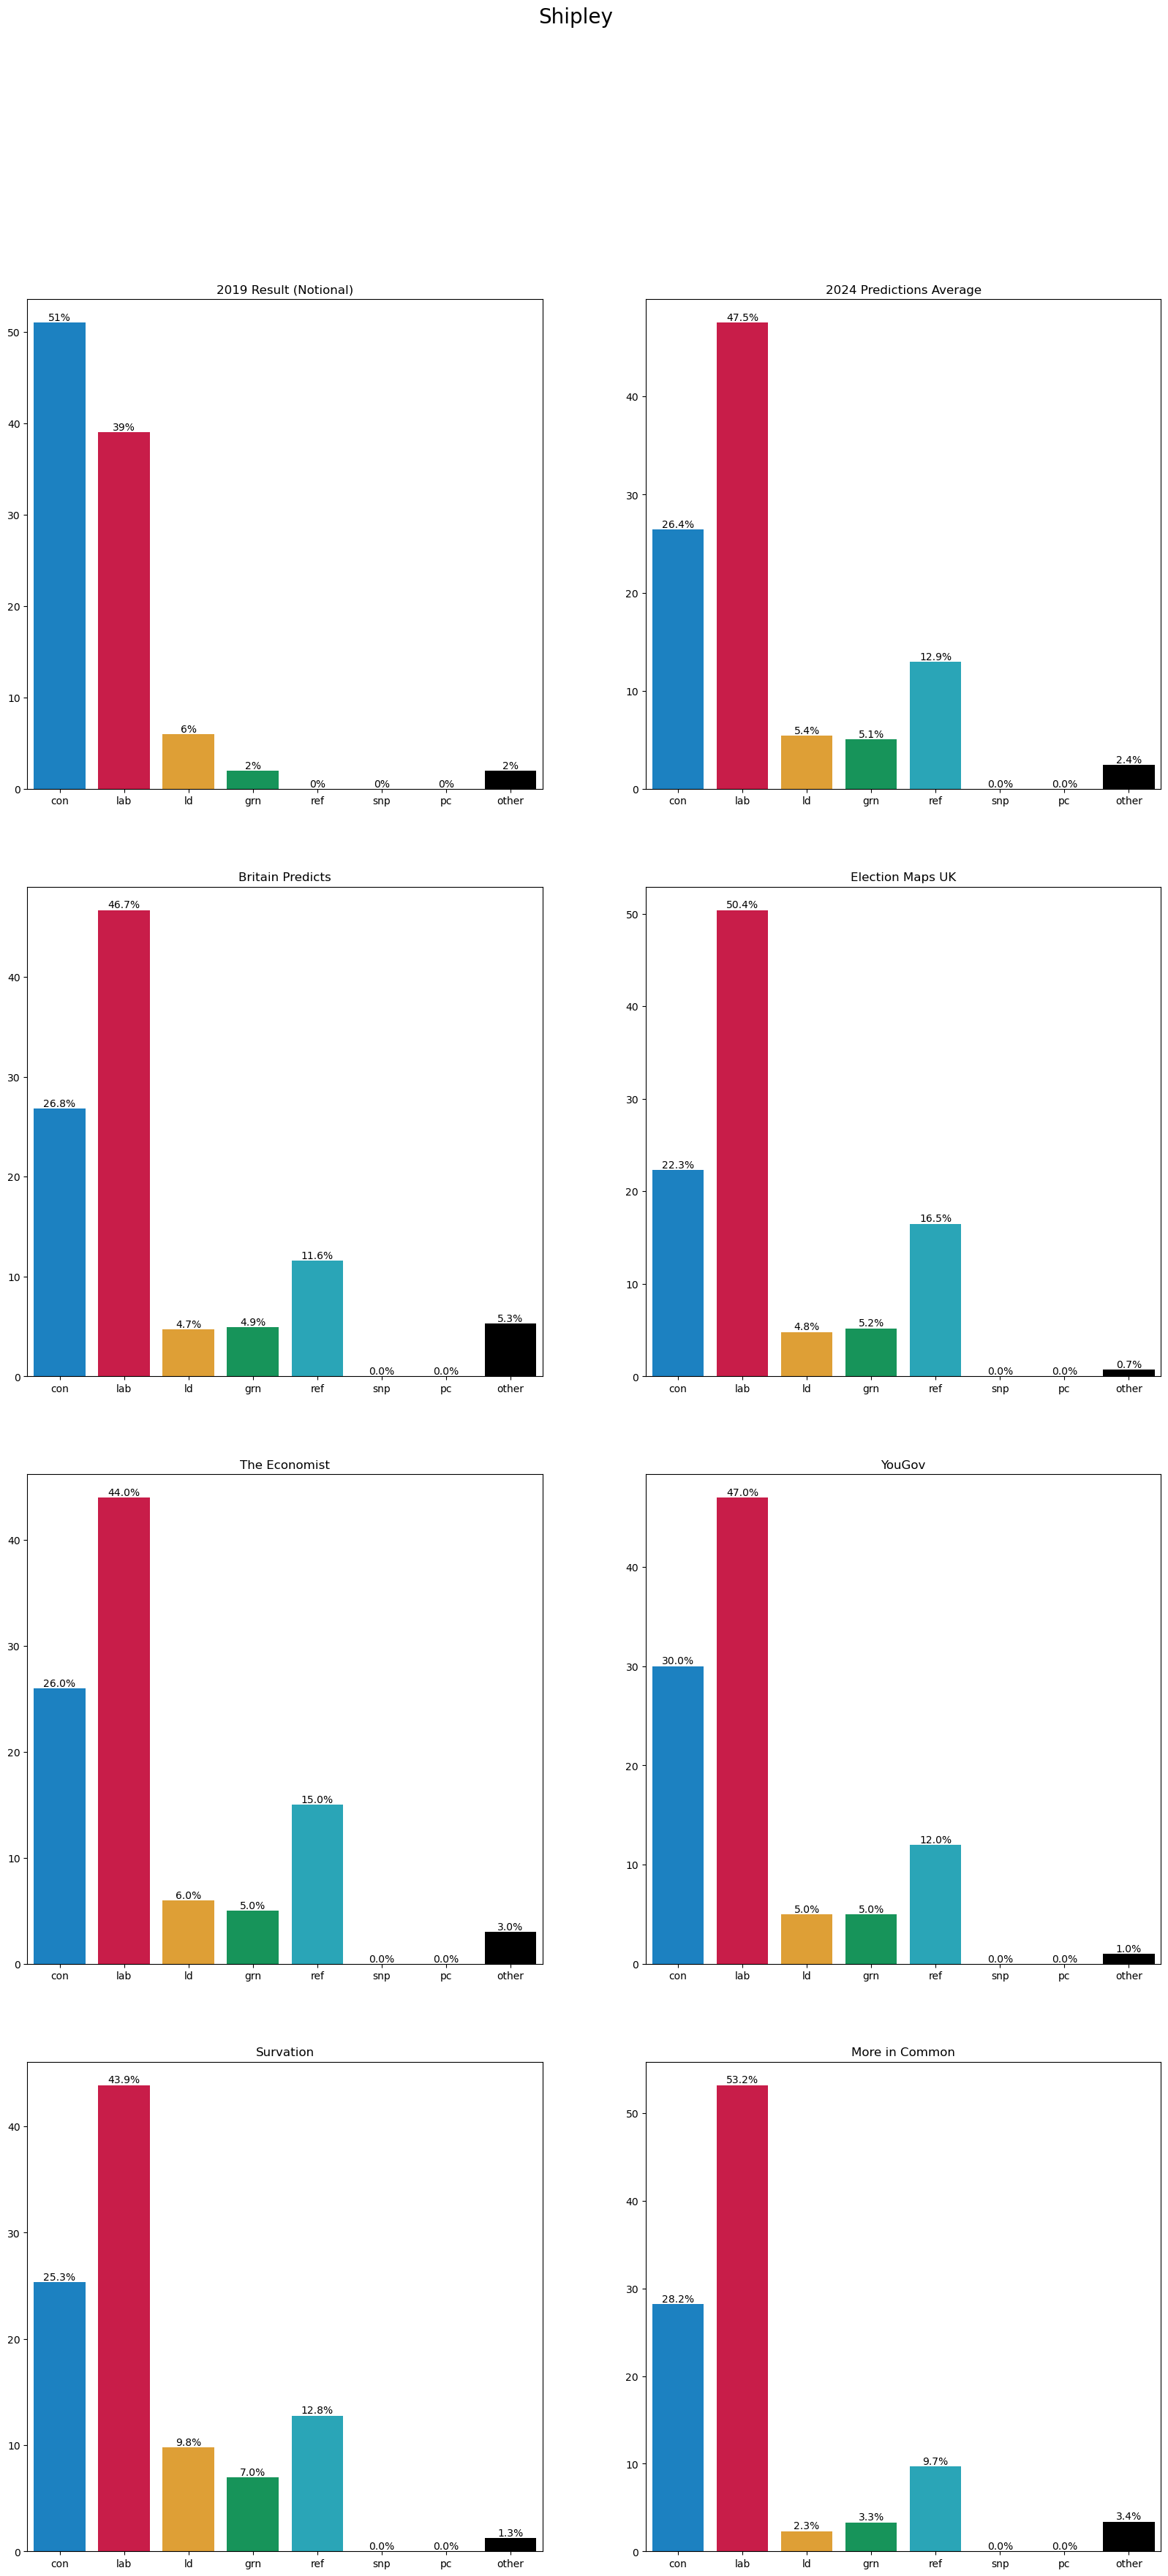

In [24]:
constituency = "Shipley"

map_constituency(constituency)
constituency_predictions(constituency, show="all")